In [0]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
image_dim=32

In [0]:
def parse_function(filename):
    image_string=tf.read_file(filename)
    image=tf.image.decode_png(image_string,channels=3)
    image=tf.image.convert_image_dtype(image,tf.float32)

    resized_image=tf.image.resize_images(image,[image_dim,image_dim])
    return resized_image

def train_preprocess(image):
    image=tf.image.random_flip_left_right(image)
    image=tf.image.random_brightness(image,max_delta=32.0/255.0)
    image=tf.image.random_saturation(image,lower=0.5,upper=1.5)
    
    image=tf.clip_by_value(image,0.0,1.0)
    
    return image 


In [0]:
def read_data(filenames):
    dataset=tf.data.Dataset.from_tensor_slices((filenames))
    dataset=dataset.map(parse_function)
    dataset=dataset.map(train_preprocess)
    
    iterator=dataset.make_one_shot_iterator()
    return iterator


In [0]:
def build_training(filenames):
    X=np.zeros((len(filenames),image_dim,image_dim,3))
    iterator=read_data(filenames)
    next_element=iterator.get_next()
    with tf.Session() as sess:
        for i in range(len(filenames)):
            image_example=sess.run(next_element)
            X[i,:,:]=image_example[:,:,:]
        return X

In [23]:
filenames=['zero_1.PNG','zero_2.PNG','zero_3.PNG','zero_4.PNG','zero_5.PNG','zero_6.PNG','zero_7.PNG','zero_8.PNG','zero_9.PNG','zero_10.PNG','one_1.PNG','one_2.PNG','one_3.PNG','one_4.PNG','one_5.PNG','one_6.PNG','one_7.PNG','one_8.PNG','one_9.PNG','one_10.PNG','two_1.PNG','two_2.PNG','two_3.PNG','two_4.PNG','two_5.PNG','two_6.PNG','two_7.PNG','two_8.PNG','two_9.PNG','two_10.PNG','three_1.PNG','three_2.PNG','three_3.PNG','three_4.PNG','three_5.PNG','three_6.PNG','three_7.PNG','three_8.PNG','three_9.PNG','three_10.PNG','four_1.PNG','four_2.PNG','four_3.PNG','four_4.PNG','four_5.PNG','four_6.PNG','four_7.PNG','four_8.PNG','four_9.PNG','four_10.PNG','five_1.PNG','five_2.PNG','five_3.PNG','five_4.PNG','five_5.PNG','five_6.PNG','five_7.PNG','five_8.PNG','five_9.PNG','five_10.PNG','six_1.PNG','six_2.PNG','six_3.PNG','six_4.PNG','six_5.PNG','six_6.PNG','six_7.PNG','six_8.PNG','six_9.PNG','six_10.PNG','seven_1.PNG','seven_2.PNG','seven_3.PNG','seven_4.PNG','seven_5.PNG','seven_6.PNG','seven_7.PNG','seven_8.PNG','seven_9.PNG','seven_10.PNG','eight_1.PNG','eight_2.PNG','eight_3.PNG','eight_4.PNG','eight_5.PNG','eight_6.PNG','eight_7.PNG','eight_8.PNG','eight_9.PNG','eight_10.PNG','nine_1.PNG','nine_2.PNG','nine_3.PNG','nine_4.PNG','nine_5.PNG','nine_6.PNG','nine_7.PNG','nine_8.PNG','nine_9.PNG','nine_10.PNG']
Y=np.array([0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,2,2,2,2,2,2,2,2,2,2,3,3,3,3,3,3,3,3,3,3,4,4,4,4,4,4,4,4,4,4,5,5,5,5,5,5,5,5,5,5,6,6,6,6,6,6,6,6,6,6,7,7,7,7,7,7,7,7,7,7,8,8,8,8,8,8,8,8,8,8,9,9,9,9,9,9,9,9,9,9])
X=build_training(filenames)

model=tf.keras.models.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(image_dim*image_dim*3,activation=tf.nn.relu),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10,activation=tf.nn.softmax)
])

model.compile(optimizer='adam',lr=0.1,beta_1=0.9, beta_2=0.999,
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(X,Y,epochs=5000,batch_size=150)
model.summary()
model.evaluate(X,Y)

Epoch 1/5000
100/100 [==============================] - 1s 9ms/step - loss: 2.3996 - acc: 0.0900
Epoch 2/5000
100/100 [==============================] - 0s 1ms/step - loss: 6.9746 - acc: 0.1000
Epoch 3/5000
100/100 [==============================] - 0s 1ms/step - loss: 7.5867 - acc: 0.1000
Epoch 4/5000
100/100 [==============================] - 0s 1ms/step - loss: 7.6232 - acc: 0.1000
Epoch 5/5000
100/100 [==============================] - 0s 1ms/step - loss: 8.1427 - acc: 0.1000
Epoch 6/5000
100/100 [==============================] - 0s 2ms/step - loss: 8.6705 - acc: 0.1000
Epoch 7/5000
100/100 [==============================] - 0s 2ms/step - loss: 8.0055 - acc: 0.1000
Epoch 8/5000
100/100 [==============================] - 0s 2ms/step - loss: 8.0954 - acc: 0.1000
Epoch 9/5000
100/100 [==============================] - 0s 2ms/step - loss: 8.1192 - acc: 0.1000
Epoch 10/5000
100/100 [==============================] - 0s 2ms/step - loss: 8.2971 - acc: 0.1000
Epoch 11/5000
100/100 [======

[0.011017615478485822, 1.0]

/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


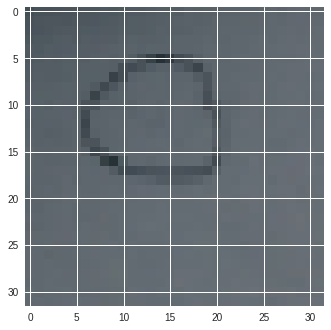

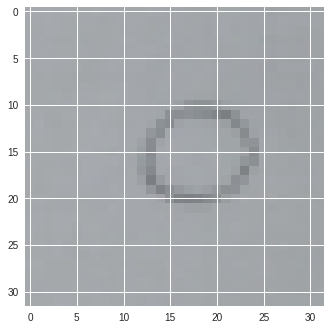

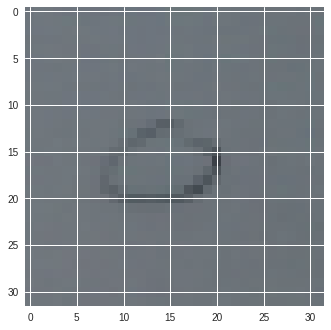

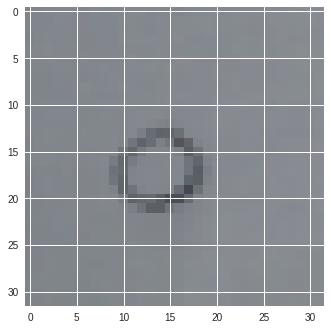

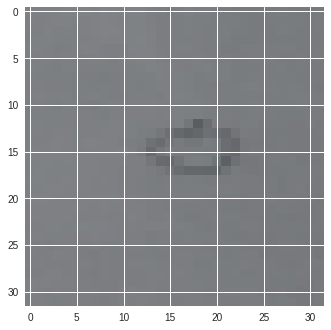

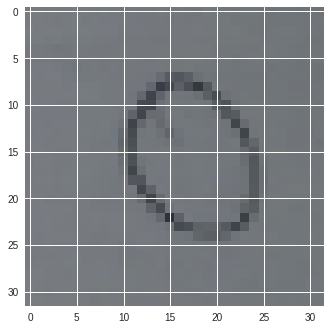

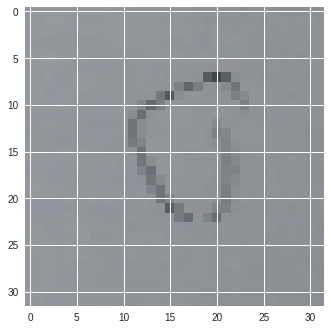

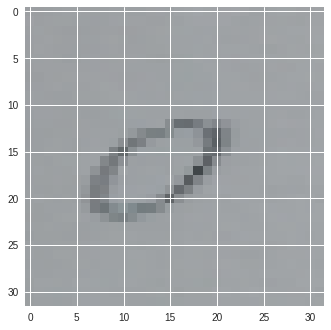

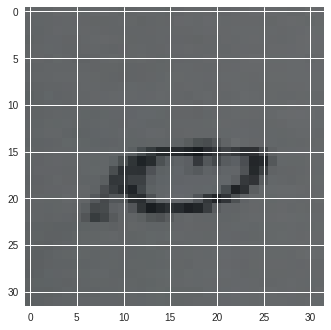

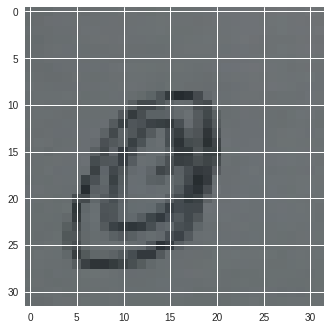

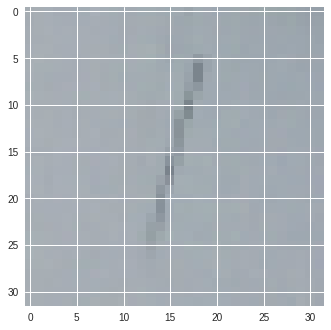

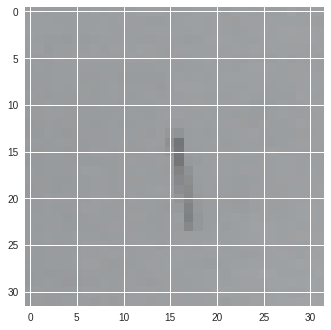

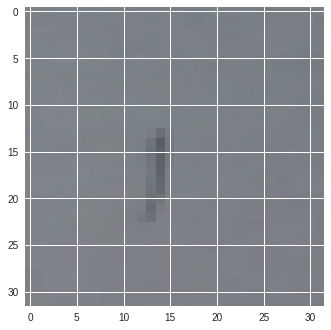

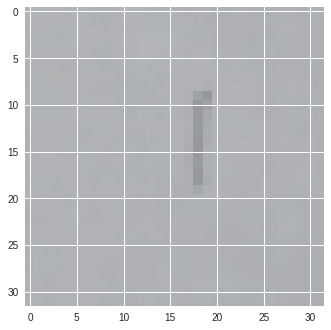

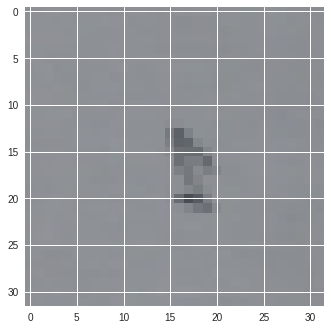

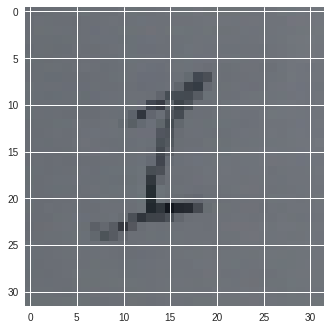

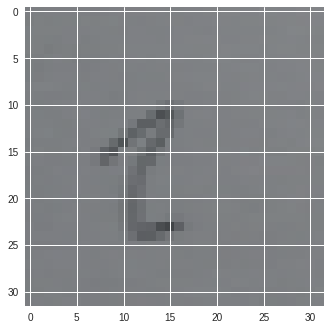

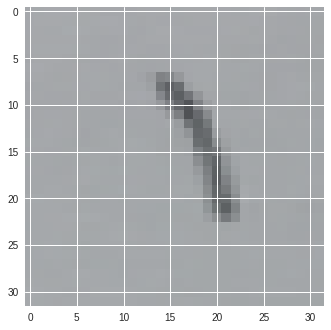

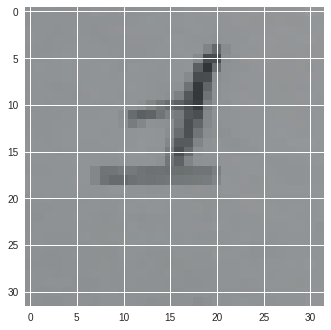

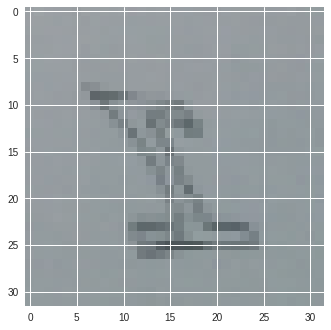

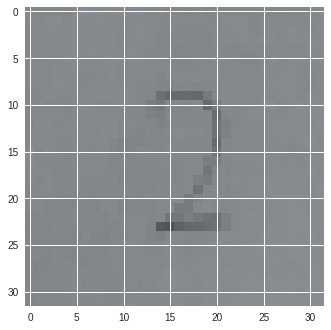

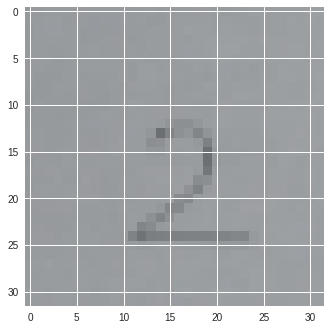

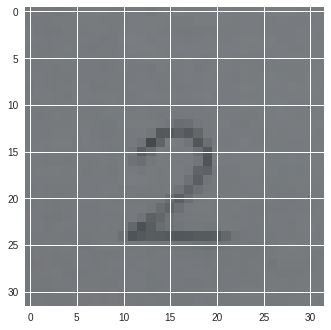

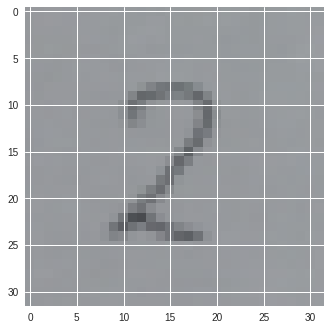

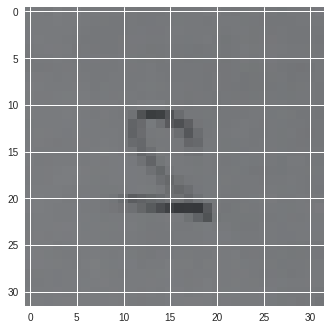

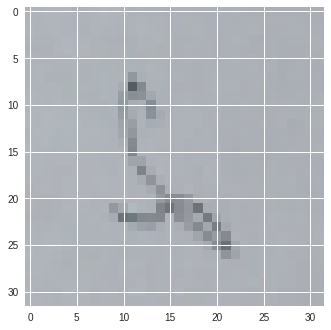

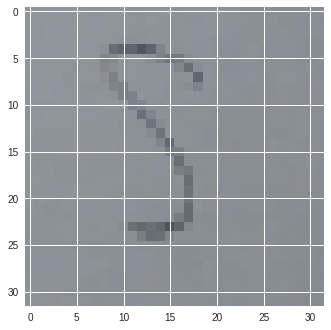

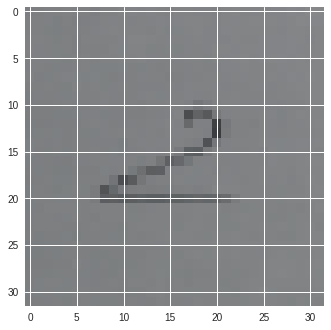

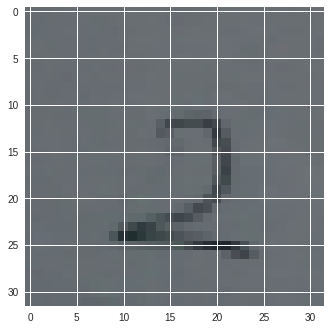

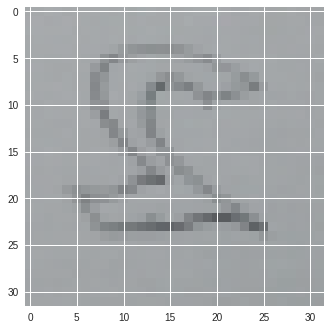

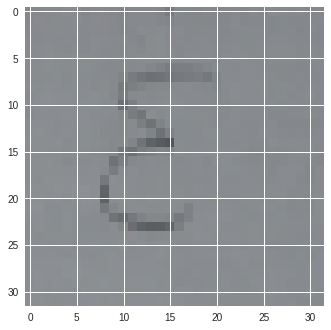

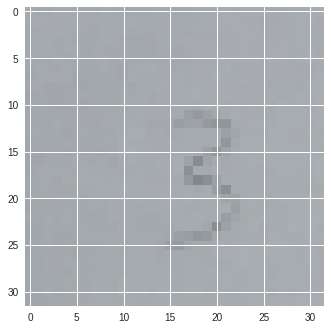

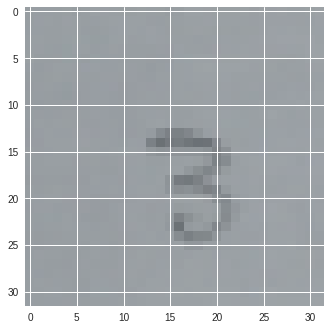

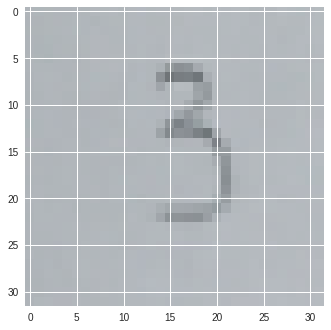

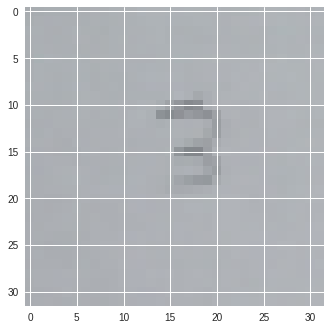

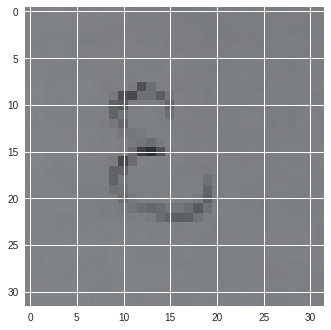

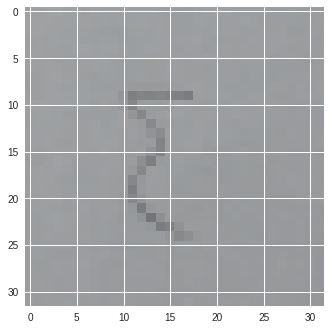

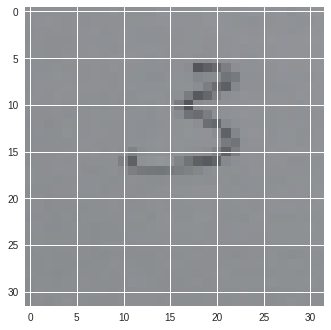

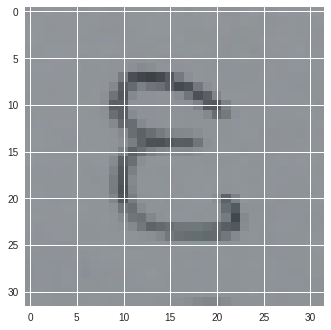

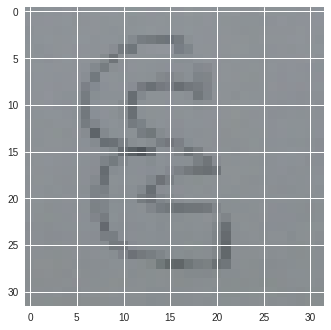

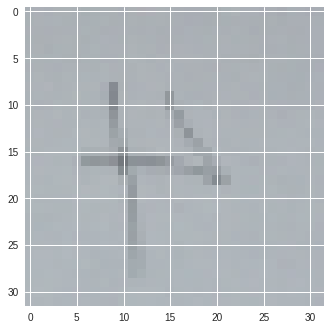

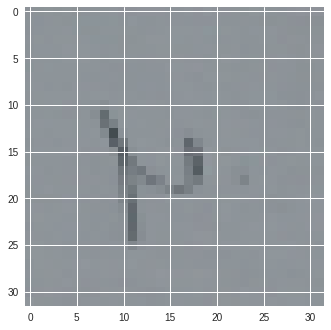

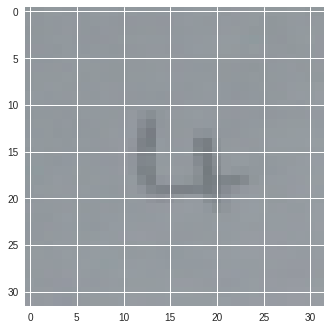

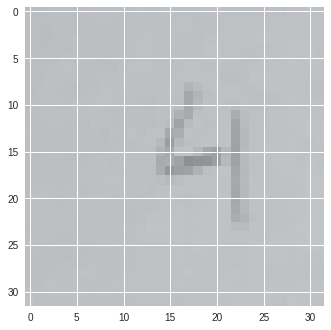

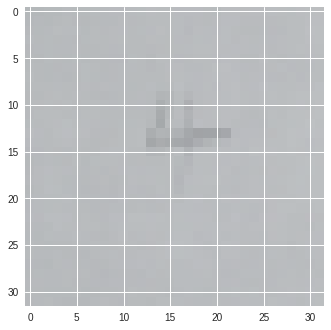

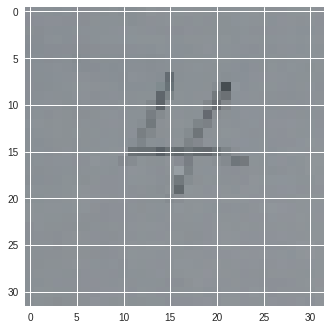

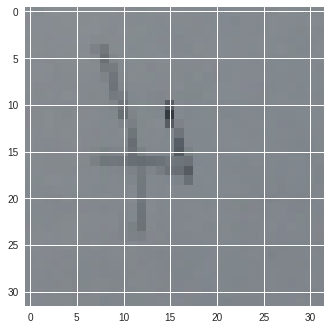

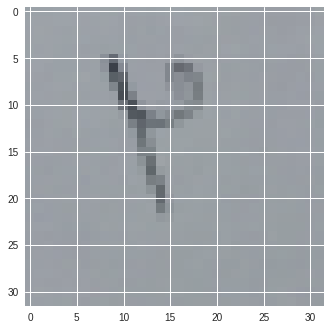

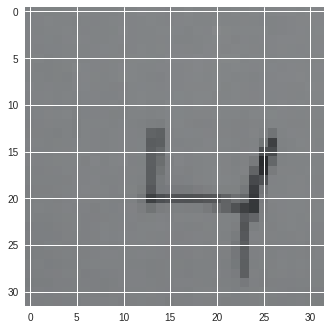

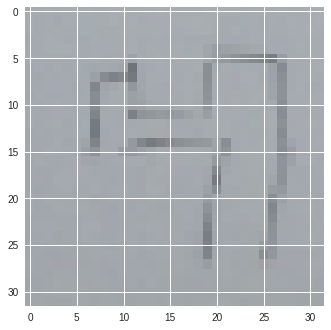

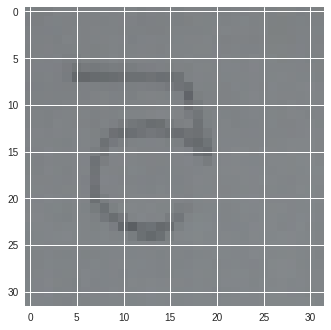

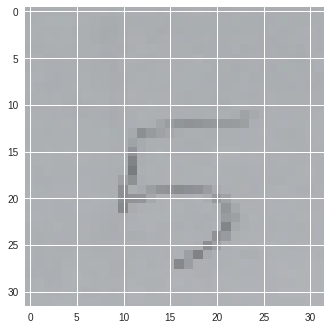

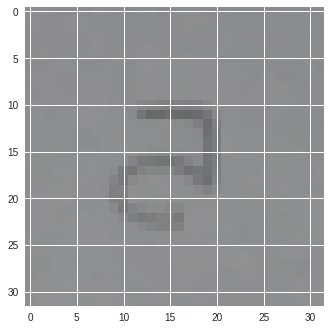

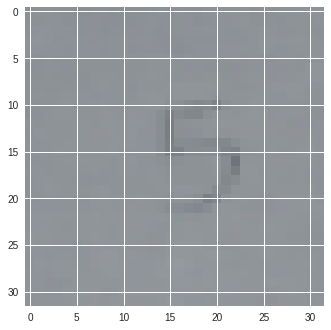

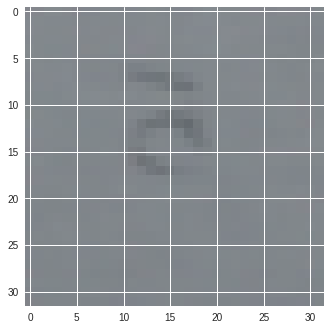

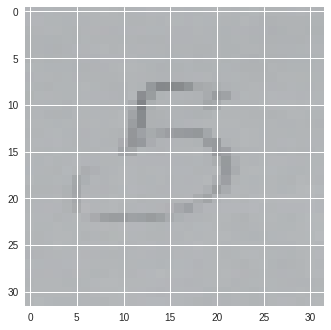

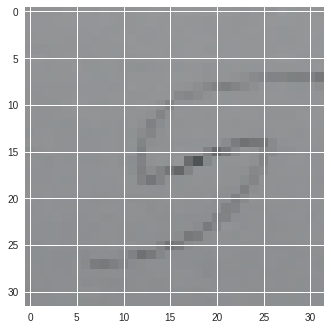

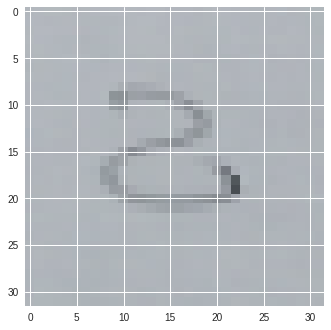

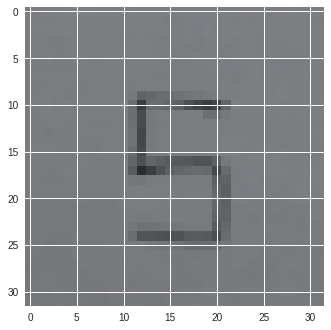

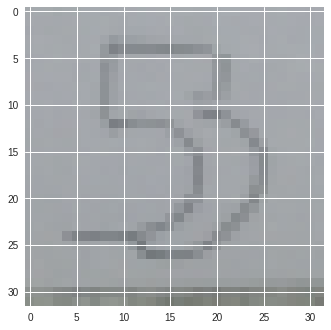

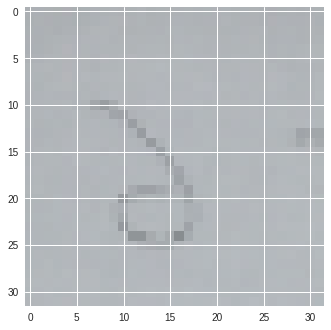

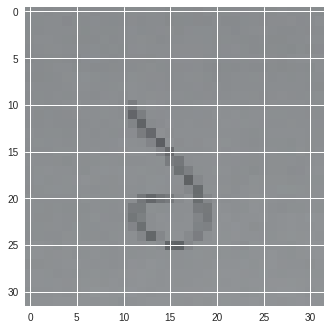

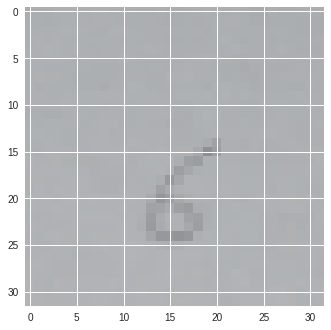

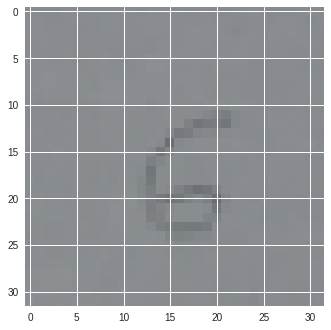

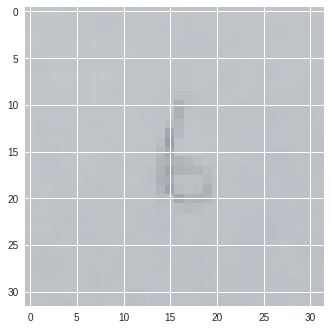

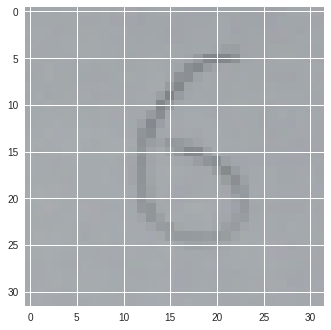

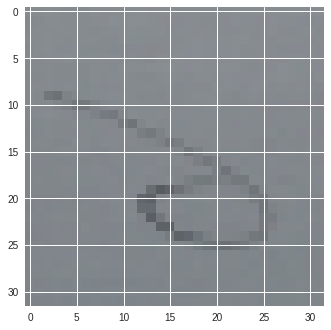

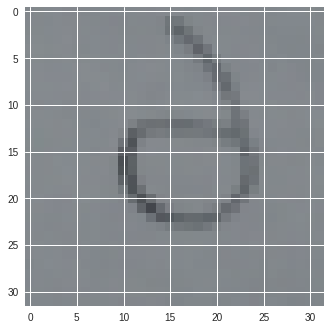

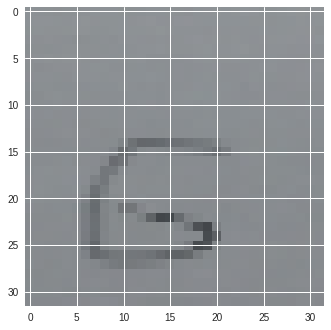

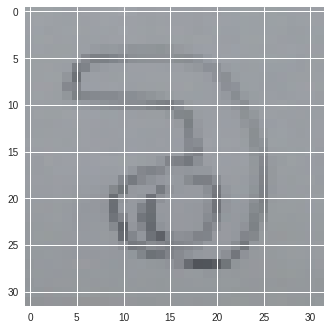

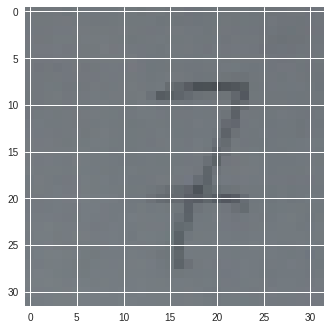

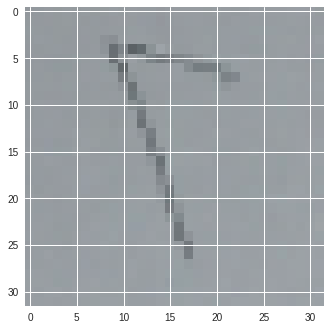

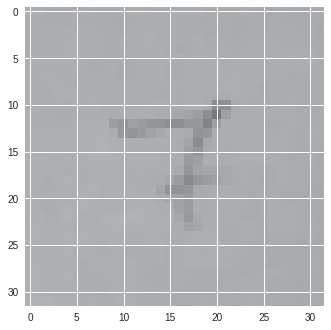

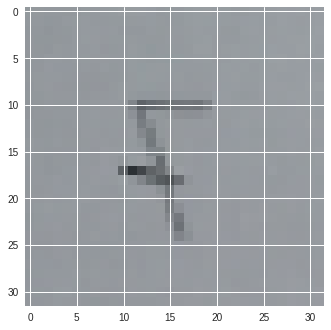

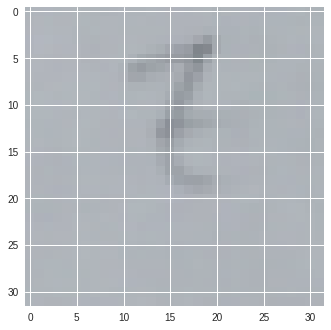

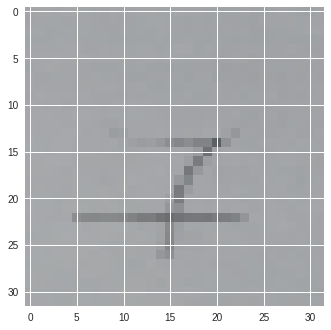

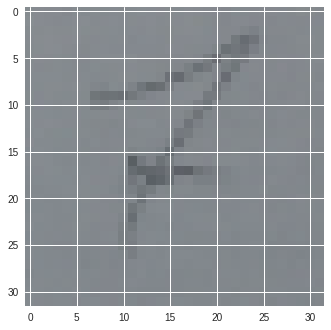

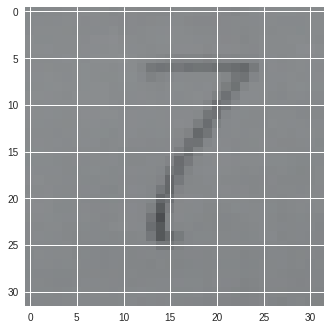

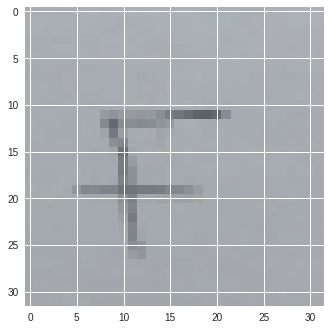

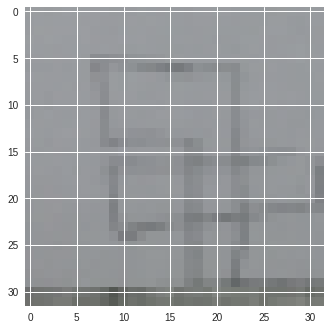

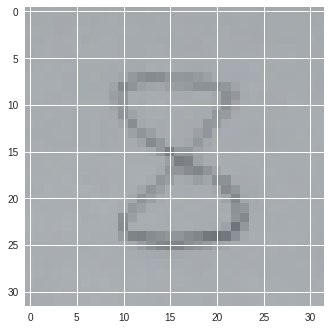

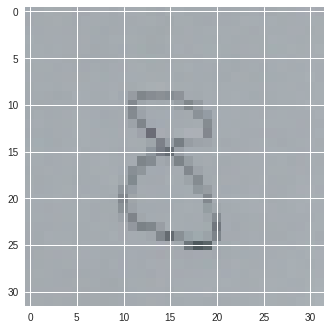

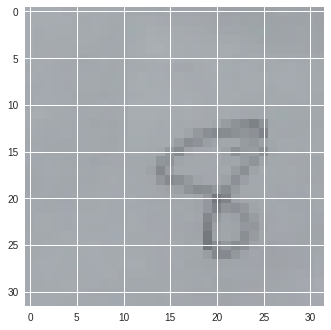

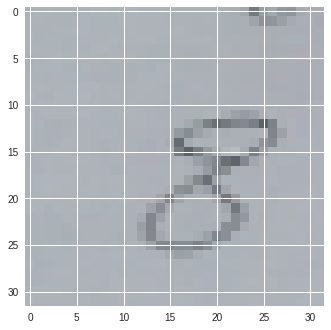

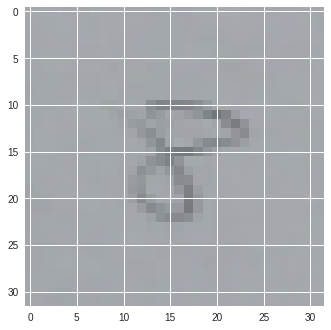

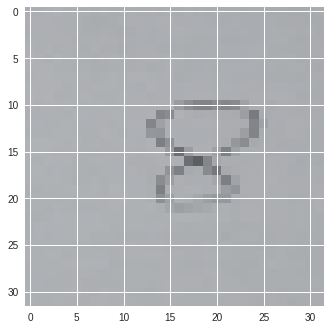

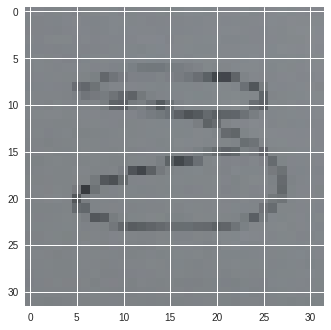

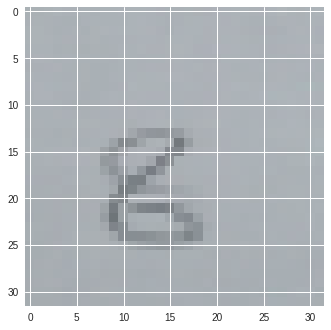

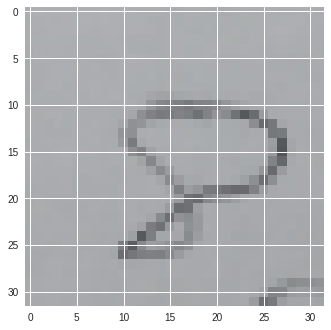

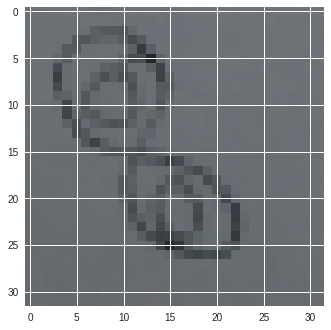

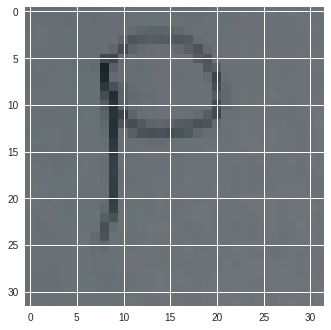

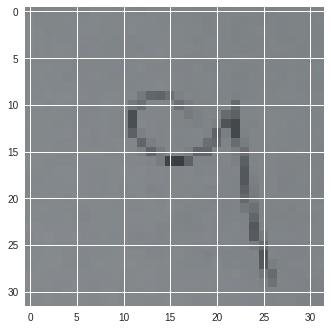

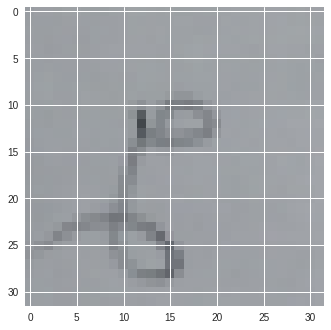

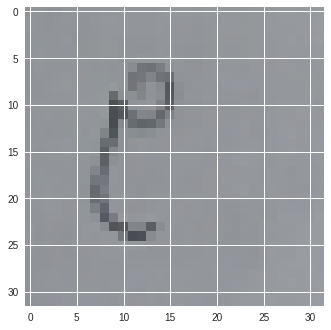

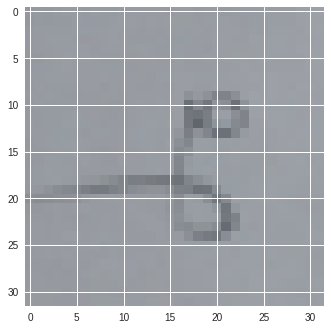

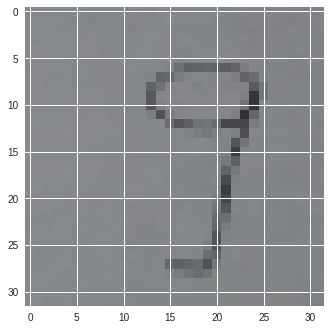

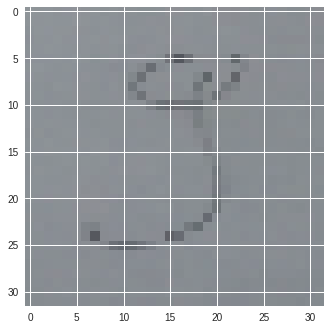

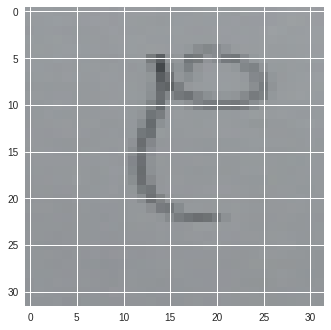

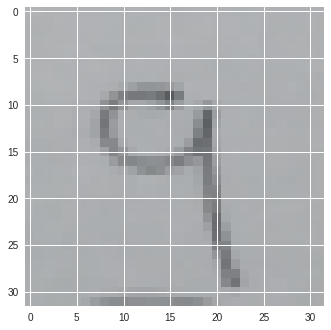

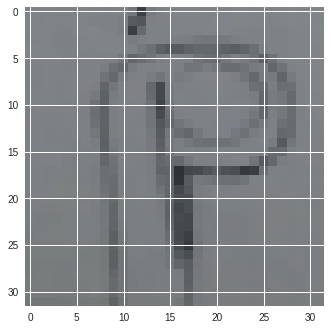

In [33]:
import numpy as np
filenames=['zero_1.PNG','zero_2.PNG','zero_3.PNG','zero_4.PNG','zero_5.PNG','zero_6.PNG','zero_7.PNG','zero_8.PNG','zero_9.PNG','zero_10.PNG','one_1.PNG','one_2.PNG','one_3.PNG','one_4.PNG','one_5.PNG','one_6.PNG','one_7.PNG','one_8.PNG','one_9.PNG','one_10.PNG','two_1.PNG','two_2.PNG','two_3.PNG','two_4.PNG','two_5.PNG','two_6.PNG','two_7.PNG','two_8.PNG','two_9.PNG','two_10.PNG','three_1.PNG','three_2.PNG','three_3.PNG','three_4.PNG','three_5.PNG','three_6.PNG','three_7.PNG','three_8.PNG','three_9.PNG','three_10.PNG','four_1.PNG','four_2.PNG','four_3.PNG','four_4.PNG','four_5.PNG','four_6.PNG','four_7.PNG','four_8.PNG','four_9.PNG','four_10.PNG','five_1.PNG','five_2.PNG','five_3.PNG','five_4.PNG','five_5.PNG','five_6.PNG','five_7.PNG','five_8.PNG','five_9.PNG','five_10.PNG','six_1.PNG','six_2.PNG','six_3.PNG','six_4.PNG','six_5.PNG','six_6.PNG','six_7.PNG','six_8.PNG','six_9.PNG','six_10.PNG','seven_1.PNG','seven_2.PNG','seven_3.PNG','seven_4.PNG','seven_5.PNG','seven_6.PNG','seven_7.PNG','seven_8.PNG','seven_9.PNG','seven_10.PNG','eight_1.PNG','eight_2.PNG','eight_3.PNG','eight_4.PNG','eight_5.PNG','eight_6.PNG','eight_7.PNG','eight_8.PNG','eight_9.PNG','eight_10.PNG','nine_1.PNG','nine_2.PNG','nine_3.PNG','nine_4.PNG','nine_5.PNG','nine_6.PNG','nine_7.PNG','nine_8.PNG','nine_9.PNG','nine_10.PNG']

Y=np.array([0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,2,2,2,2,2,2,2,2,2,2,3,3,3,3,3,3,3,3,3,3,4,4,4,4,4,4,4,4,4,4,5,5,5,5,5,5,5,5,5,5,6,6,6,6,6,6,6,6,6,6,7,7,7,7,7,7,7,7,7,7,8,8,8,8,8,8,8,8,8,8,9,9,9,9,9,9,9,9,9,9])
X=build_training(filenames)


for i in range(100):
    plt.figure()
    plt.imshow(X[i,:,:,:])